### This project uses autoencoders to reduce the dimension. The MNIST dataset will be used as an implementation of the model.

In [1]:
#### Importing Libraries and dataset
import numpy as np
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


In [2]:
# Acquire MNIST data
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images,test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# reshape the data
### seems data has been flattened

train_images= np.reshape(train_images,(-1,784))
test_images= np.reshape(test_images,(-1,784))

In [4]:
# normalize data
train_images= train_images.astype('float32')/255
test_images =test_images.astype('float32')/255

### Creating the autoencoder Model

In [5]:
input_dim =28*28  # actual dimension(size) of the input image
latent_dim=2      # the desired output dimension 

input_layer= Input(shape=(input_dim))

# defining the autoencoder architecture

# encoder layer

x= Dense(500,activation='sigmoid')(input_layer)   # the dimesiions in the dense layer gradually reduces till it gets to 2
x= Dense(300, activation='sigmoid')(x)
x= Dense(100, activation='sigmoid')(x)
x= Dense(latent_dim, activation='tanh')(x)        # encoder dimension=2


#decoder layer

y= Dense(100, activation='sigmoid')(x)
y= Dense(300, activation='sigmoid')(y)
y= Dense(500, activation='sigmoid')(y)
y= Dense(input_dim, activation='sigmoid')(y)         # decoder dimesion begins to increase

# combining the encoder and decoder into one- autoencoder

autoencoder = Model(input_layer, y, name="Autoencoder")

# compiling the autoencoder

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

autoencoder.summary()

Model: "Autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 2)                 202       
                                                                 
 dense_4 (Dense)             (None, 100)               300       
                                                                 
 dense_5 (Dense)             (None, 300)               

### Training phase

In [6]:
history= autoencoder.fit(train_images,train_images, epochs=100, batch_size=120, shuffle=True, validation_data=(test_images,test_images))

Epoch 1/100
500/500 [==============================] - 16s 8ms/step - loss: 0.2681 - val_loss: 0.2636
Epoch 2/100
500/500 [==============================] - 2s 4ms/step - loss: 0.2623 - val_loss: 0.2443
Epoch 3/100
500/500 [==============================] - 2s 5ms/step - loss: 0.2369 - val_loss: 0.2303
Epoch 4/100
500/500 [==============================] - 4s 8ms/step - loss: 0.2258 - val_loss: 0.2192
Epoch 5/100
500/500 [==============================] - 4s 7ms/step - loss: 0.2167 - val_loss: 0.2135
Epoch 6/100
500/500 [==============================] - 2s 4ms/step - loss: 0.2119 - val_loss: 0.2089
Epoch 7/100
500/500 [==============================] - 2s 5ms/step - loss: 0.2085 - val_loss: 0.2077
Epoch 8/100
500/500 [==============================] - 4s 8ms/step - loss: 0.2075 - val_loss: 0.2048
Epoch 9/100
500/500 [==============================] - 4s 7ms/step - loss: 0.2041 - val_loss: 0.2019
Epoch 10/100
500/500 [==============================] - 4s 7ms/step - loss: 0.2032 - val_l

# Visualizing the training and validation loss

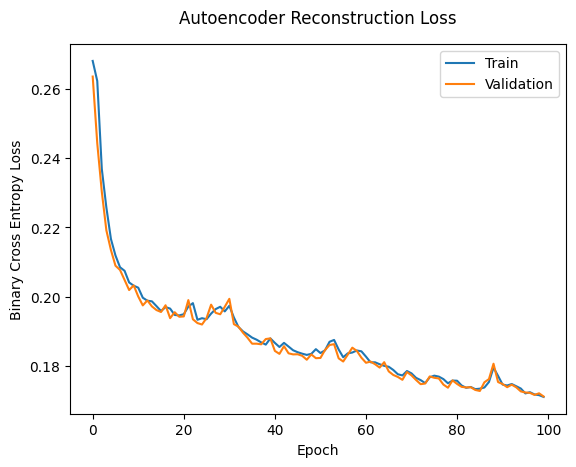

In [7]:
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=15)
plt.legend(loc='upper right')

## Comparing the test images with the the compressed MNIST digits after autoencoding.

In [8]:
# use the autoencoder to compress the test images

compressed_images = autoencoder.predict(test_images) 

313/313 [==============================] - 1s 2ms/step


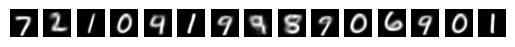

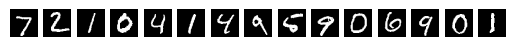

In [17]:
n=15      # number of digits to display

# dispalying the compressed digits
for i in range(n):
  # arranging the format to display the compressed images
  ax = plt.subplot( 1, n, i+1)
  plt.imshow(compressed_images[i].reshape(28,28),cmap='gray')
  ax.axis('off')
plt.show()

# displaying the original images
for i in range(n):
  ay= plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28,28),cmap='gray')
  ay.axis('off')
plt.show()

### The results show that even with a reduced dimension, the images as still somewhat clear